## Medline citations
source: https://www.nlm.nih.gov/bsd/medline_cit_counts_yr_pub.html

*Derived from the 2022 MEDLINE/PubMed Baseline produced in January 2022. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

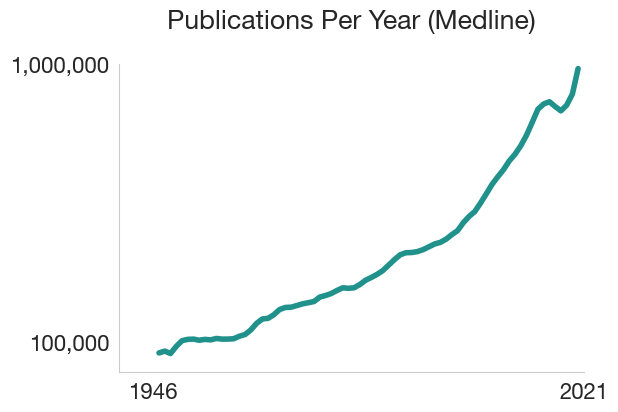

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('./medline_citation_data.tsv', delimiter='\t')

# drop last three rows and first column
data = data[:-3]
data = data[1:]

data['Year of Publication'] = data['Year of Publication'].apply(lambda x: int(x[:4]))
data['Total # Citations'] = data['Total # Citations'].apply(lambda x: int(x.replace(',','')))

data = data[['Year of Publication', 'Total # Citations']]
data.columns = ['year', 'citations']

data = data[::-1]
data['cumulative_citations'] = data['citations'].cumsum()

sns.set_style('whitegrid')

plt.rcParams['font.family'] = 'Helvetica Neue'

# Set font size for the tick labels
plt.rcParams['font.size'] = 16

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, 3))

# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))  # Set figure size

data.plot(x='year', y='citations', ax=ax, color=colors[1], style='-', linewidth='4')

# Remove grid lines
ax.grid(False)

# Remove horizontal and vertical axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the final point of the curve
final_citation = data['citations'].iloc[-1]
final_year = data['year'].iloc[-1]

y_min = 0
y_max = 1000000
x_min = 1940
x_max = 2021

ax.set_ylim(y_min, y_max)
ax.set_xlim(x_min, x_max)
ax.yaxis.set_ticks(np.linspace(y_min + 100000, y_max, 2))
ax.xaxis.set_ticks(np.linspace(x_min + 6 , x_max, 2))

ax.legend().remove()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

arrowprops = dict(
    arrowstyle = "<-",
    color='gray',)

# ax.annotate('two paper every minute',
#             xy=(final_year + timedelta(days=750), final_citation),
#             xytext=(final_year + timedelta(days=5000), final_citation),  # Adjust the position of the annotation
#             arrowprops=arrowprops,
#             annotation_clip=False,
#             ha='left',
#             va='center')
# Set title and labels
plt.title('Publications Per Year (Medline)\n')
# plt.xlabel('Year of Publication')
plt.xlabel('')
# plt.tight_layout()
# plt.title('Citations per Year in MEDLINE')

# Show the plot
plt.savefig('./plots/papers_per_year.png', dpi=300, bbox_inches='tight')
plt.show()


## Safetyreports

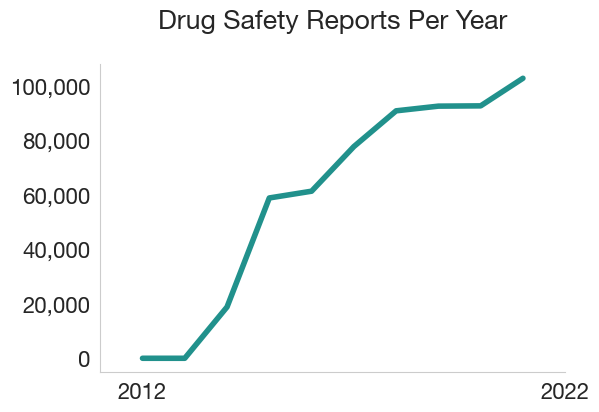

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import re

lines = []
# with open('./faers_safetyreports_per_file.txt', 'r') as fp:
with open('./faers_literaturereference_per_file.txt', 'r') as fp:
    lines = fp.readlines()

years = []
counts = []

for line in lines:
    line.strip('\n')
    year = line.split(': ')[0]
    year = '20' + re.search(r'(\d{2})Q\d', year).group(1)
    year = int(year)
    count = int(line.split(': ')[1])

    years.append(year)
    counts.append(count)

data = pd.DataFrame(data={"year":years, "reports":counts})
data = data.groupby('year').sum().reset_index()
data = data.sort_values('year')

# drop 2022
data = data[:-1]



sns.set_style('whitegrid')

plt.rcParams['font.family'] = 'Helvetica Neue'

# Set font size for the tick labels
plt.rcParams['font.size'] = 16


cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, 3))

# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))  # Set figure size

data.plot(x='year', y='reports', ax=ax, color=colors[1], style='-', linewidth='4')

# Remove grid lines
ax.grid(False)

# Remove horizontal and vertical axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the final point of the curve
final_citation = data['reports'].iloc[-1]
final_year = data['year'].iloc[-1]

ax.legend().remove()

# Set the y-axis limits and tick positions
# y_min = data['reports'].min()
# y_max = data['reports'].max()
# y_min = 100000
# y_max = 2000000
x_min = 2011
x_max = 2021
# ax.set_ylim(y_min, y_max)
# ax.set_ylim(y_min, y_max)
ax.set_xlim(x_min, x_max)
# ax.yaxis.set_ticks(np.linspace(y_min + 200000, y_max, 2))
ax.xaxis.set_ticks(np.linspace(x_min + 1, x_max + 1, 2))

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

arrowprops = dict(
    arrowstyle="<-",
    color='gray')

# ax.annotate('Three reports every minute',
#             xy=(final_year + 0.2, final_citation),
#             xytext=(final_year + 2, final_citation),  # Adjust the position of the annotation
#             arrowprops=arrowprops,
#             annotation_clip=False,
#             ha='left',
#             va='center')

# Set title and labels
plt.title('Drug Safety Reports Per Year\n')
plt.xlabel('')
# plt.ylabel('Number of Reports')

# Show the plot
# plt.savefig('./plots/reports_per_year.png', dpi=300, bbox_inches='tight')
plt.show()


## Both on one plot

In [4]:
# medline data
data_medline = pd.read_csv('./medline_citation_data.tsv', delimiter='\t')

data_medline = data_medline[:-3]
data_medline = data_medline[1:]

data_medline['Year of Publication'] = data_medline['Year of Publication'].apply(lambda x: int(x[:4]))
data_medline['Total # Citations'] = data_medline['Total # Citations'].apply(lambda x: int(x.replace(',','')))

data_medline = data_medline[['Year of Publication', 'Total # Citations']]
data_medline.columns = ['year', 'citations']

data_medline = data_medline[::-1]

# FAERS safetyreport
lines = []
# with open('./faers_literaturereference_per_file.txt', 'r') as fp:
with open('./faers_safetyreports_per_file.txt', 'r') as fp:
    lines = fp.readlines()

years = []
counts = []

for line in lines:
    line.strip('\n')
    year = line.split(': ')[0]
    year = '20' + re.search(r'(\d{2})Q\d', year).group(1)
    year = int(year)
    count = int(line.split(': ')[1])

    years.append(year)
    counts.append(count)

data_faers = pd.DataFrame(data={"year":years, "reports":counts})
data_faers = data_faers.groupby('year').sum().reset_index()
data_faers = data_faers.sort_values('year')

# drop 2022
data_faers = data_faers[:-1]

# FAERS literaturereference
lines = []
with open('./faers_literaturereference_per_file.txt', 'r') as fp:
    lines = fp.readlines()

years = []
counts = []

for line in lines:
    line.strip('\n')
    year = line.split(': ')[0]
    year = '20' + re.search(r'(\d{2})Q\d', year).group(1)
    year = int(year)
    count = int(line.split(': ')[1])

    years.append(year)
    counts.append(count)

data_faers_litref = pd.DataFrame(data={"year":years, "reports":counts})
data_faers_litref = data_faers_litref.groupby('year').sum().reset_index()
data_faers_litref = data_faers_litref.sort_values('year')

# drop 2022
data_faers_litref = data_faers_litref[:-1]

# AERS data
lines = []
with open('./aers_safetyreports_per_file.txt', 'r') as fp:
    lines = fp.readlines()

years = []
counts = []

for line in lines:
    line.strip('\n')
    date = line.split(': ')[0]
    year = '20' + re.search(r'ADR(\d{2})M(\d{2})', date).group(1)
    month = re.search(r'ADR(\d{2})M(\d{2})', date).group(2)
    year = int(year)
    month = int(month)
    count = int(line.split(': ')[1])

    years.append(year)
    counts.append(count)

data_aers = pd.DataFrame(data={"year":years, "reports":counts})

data_safetyreports = pd.concat([data_aers, data_faers])

data_safetyreports = data_safetyreports.groupby('year').sum().reset_index()
data_safetyreports = data_safetyreports.sort_values('year')

In [5]:
data_safetyreports

,year,reports
0,2004,272017
1,2005,325972
2,2006,323489
3,2007,377773
4,2008,439819
5,2009,489997
6,2010,671919
7,2011,782106
8,2012,831521
9,2013,812596


In [6]:
data_faers_litref

,year,reports
0,2012,0
1,2013,0
2,2014,18827
3,2015,58837
4,2016,61318
5,2017,77692
6,2018,90813
7,2019,92532
8,2020,92637
9,2021,102758


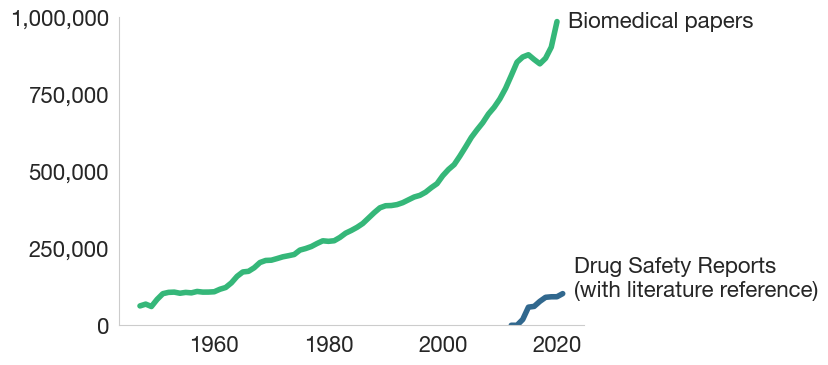

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import re


sns.set_style('whitegrid')

plt.rcParams['font.family'] = 'Helvetica Neue'

# Set font size for the tick labels
plt.rcParams['font.size'] = 16


cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, 4))

# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))  # Set figure size

# data_safetyreports.plot(x='year', y='reports', ax=ax, color=colors[0], style='-', linewidth='4')
data_medline.plot(x='year', y='citations', ax=ax, color=colors[2], style='-', linewidth='4')
data_faers_litref.plot(x='year', y='reports', ax=ax, color=colors[1], style='-', linewidth='4')


# Remove grid lines
ax.grid(False)

# Remove horizontal and vertical axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the final point of the curve
faers_x = data_safetyreports['year'].iloc[-1]
faers_y = data_safetyreports['reports'].iloc[-1]
litref_x = data_faers_litref['year'].iloc[-1]
litref_y = data_faers_litref['reports'].iloc[-1]
medline_x = data_medline['year'].iloc[-1]
medline_y = data_medline['citations'].iloc[-1]

ax.legend().remove()

# Set the y-axis limits and tick positions
# y_min = data['reports'].min()
# y_max = data['reports'].max()
y_min = -0
# y_max = 2000000
y_max = 1000000
x_min = 1930
x_max = 2022
ax.set_ylim(y_min, y_max)
# ax.set_ylim(y_min, y_max)
# ax.set_xlim(x_min, x_max)
ax.yaxis.set_ticks(np.linspace(y_min + 0, y_max, 5))
# ax.xaxis.set_ticks(np.linspace(x_min + 10, x_max , 3))

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

arrowprops = dict(
    arrowstyle="<-",
    color='gray')

# ax.annotate('Drug Safety Reports\n(all)',
#             xy=(faers_x + 0.2, faers_y),
#             xytext=(faers_x + 2, faers_y),  # Adjust the position of the annotation
#             # arrowprops=arrowprops,
#             annotation_clip=False,
#             ha='left',
#             va='center')
ax.annotate('Drug Safety Reports\n(with literature reference)',
            xy=(litref_x + 0.2, litref_y),
            xytext=(litref_x + 2, litref_y + 50000),  # Adjust the position of the annotation
            # arrowprops=arrowprops,
            annotation_clip=False,
            ha='left',
            va='center')
ax.annotate('Biomedical papers',
            xy=(medline_x + 0.2, medline_y),
            xytext=(medline_x + 2, medline_y),  # Adjust the position of the annotation
            # arrowprops=arrowprops,
            annotation_clip=False,
            ha='left',
            va='center')

# Set title and labels
# plt.title('Biomedical papers vs. drug safety reports\n')
plt.xlabel('')
# plt.ylabel('Number of Reports')

# Show the plot
plt.savefig('./plots/reports_and_articles_per_year.png', dpi=300, bbox_inches='tight')
plt.show()
